In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2

In [23]:
# 读入文件 使用方法 eg: open_txt('butterfly.txt') 输入参数为文件的相对路径
def open_txt(image_path):
    with open(image_path, 'r') as file:
        lines = file.readlines()
    num_rows = len(lines)
    num_cols = len(lines[0].strip().split(','))
    matrix = np.zeros((num_rows, num_cols))
    for i, line in enumerate(lines):
        elements = line.strip().split(',')
        matrix[i] = [float(x) for x in elements]
    return matrix.astype(np.uint8)

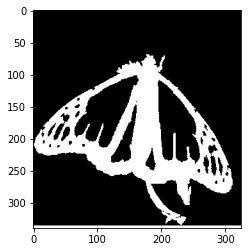

In [24]:
# 1.读取butterfly.txt图像 为 i0
i0 = open_txt('butterfly.txt')
# 显示i0
plt.imshow(i0, cmap='gray')
plt.show()

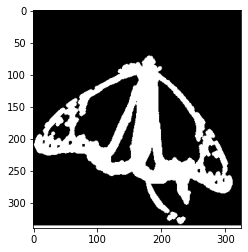

In [25]:
# 2.a) 利用se_1.txt中的结构元对i0做开操作
kernel = open_txt('se_1.txt')
opened_i0 = cv2.morphologyEx(i0, cv2.MORPH_OPEN, kernel)
plt.imshow(opened_i0, cmap='gray')
plt.show()

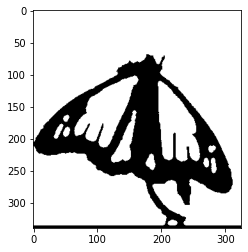

In [26]:
# 2.b) 计算补集 开操作
i0_complement = cv2.bitwise_not(i0)
opened_i0_complement = cv2.morphologyEx(i0_complement, cv2.MORPH_OPEN, kernel)
plt.imshow(opened_i0_complement, cmap='gray')
plt.show()

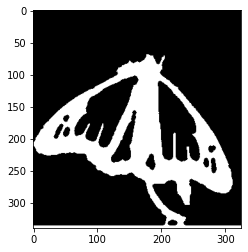

In [27]:
# 2.c) i0 闭操作
closed_i0 = cv2.morphologyEx(i0, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed_i0, cmap='gray')
plt.show()

True


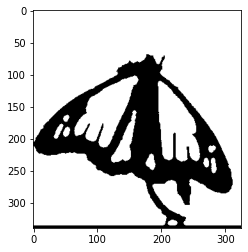

In [28]:
# 证明正确性
closed_i0_complement = cv2.bitwise_not(closed_i0)
# 计算是否相等
print(np.array_equal(opened_i0_complement, closed_i0_complement))
plt.imshow(closed_i0_complement, cmap='gray')
plt.show()